In [267]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate
import astropy.io as astro
from astropy.io import fits
from astropy.cosmology import WMAP9 as cosmo

hdu_ir_galaxy = astro.fits.open('/Users/jasonreeves/Documents/Computational Physics/' +
                                'Smass_IR_agn.fits')

help_galaxy = hdu_ir_galaxy[1].data



In [2]:
#Pull columns from the data

help_galaxy_zphot = help_galaxy[help_galaxy.columns[83].name]

help_galaxy_density = help_galaxy[help_galaxy.columns[84].name]

help_galaxy_smass = help_galaxy[help_galaxy.columns[85].name]

help_galaxy_agn_ra = help_galaxy[help_galaxy.columns[2].name]

help_galaxy_agn_dec = help_galaxy[help_galaxy.columns[3].name]

gal_irac_1_flux = help_galaxy[help_galaxy.columns[10].name]

gal_irac_2_flux = help_galaxy[help_galaxy.columns[19].name]

gal_irac_3_flux = help_galaxy[help_galaxy.columns[28].name]

gal_irac_4_flux = help_galaxy[help_galaxy.columns[37].name]

fluxes = [help_galaxy_zphot, gal_irac_1_flux, gal_irac_2_flux, gal_irac_3_flux, gal_irac_4_flux]

In [166]:
L_sun = 3.846 * 10**33 ##erg/s to L_solar

##Define luminosity bins

ir_lum_bins = np.logspace(8.5, 11.55, 25)

ir_smass_bins = np.logspace(8.5, 13.431363764158986, 25)

#set amount of disions in field lattice

divs = 30



Text(0, 0.5, 'Number density (/Mpc^3)')

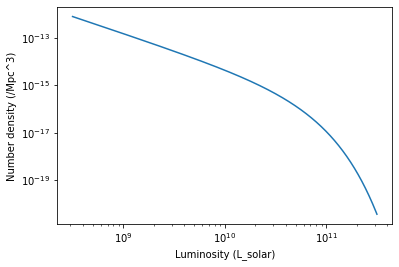

In [4]:
def mass_schechter(a_mass, M_knee, M, dM):
    y = 10**(-0.4 * (a_mass + 1) * M) * np.e**(10**(-0.4 * (M_knee - M))) * dM
    return y

def lum_schecter(L, a_lum, L_knee):
    return L**(a_lum)*np.exp(-L/L_knee)

#Adopted form Haines et al. 2010

a_lum = -1.425

L_knee = 24.83 #mJy

L_knee = 10**10.53 ##L_solar

L = np.linspace(10**8.5, 10**11.5, 10**6)

plt.plot(L, lum_schecter(L, a_lum, L_knee))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Luminosity (L_solar)')
plt.ylabel('Number density (/Mpc^3)')

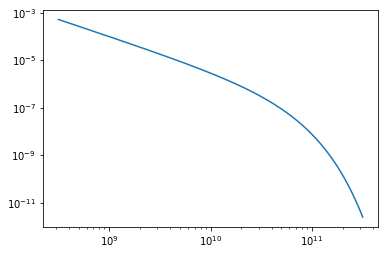

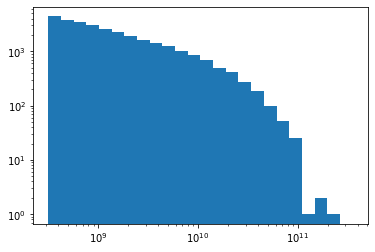

In [5]:
##Change the y values to be probabilities rather than number density

##make array of luminosity values
lums = lum_schecter(L, a_lum, L_knee)

##Divide each term by the sum of the terms so the sum of terms (equal to prob) is 1
lum_prob = lums / np.sum(lums)

##One final step to account for floating point error
lum_prob[0] = lum_prob[0] + (1-np.sum(lum_prob))

##Now we can randomly choose a Luminosity

def get_lum(N):
    return np.random.choice(L, N, p = lum_prob)

plt.plot(L, lum_prob)
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.hist(np.random.choice(L, 30000, p = lum_prob), bins = ir_lum_bins)
plt.xscale('log')
plt.yscale('log')

In [6]:
##Find luminosities of galaxies

def IR_Luminosity(fluxes):
        #find surface area of light shell in m^2
        L1 = 4 * 3.141526 * (cosmo.luminosity_distance(fluxes[0]) * 3.086 * 1e22)**2 #surface area of shell in m^2
        #find luminosity in erg per sec (multiply by frequency of light and divide by conversion factor)
        L1 = L1 * fluxes[1] * 1e12 * 84.4248 * 10**-26
        #convert to solar lum
        L1 = L1 / (3.846 * 1e33)
        
        L2 = 4*3.141526*(cosmo.luminosity_distance(fluxes[0]) * 3.086 * 1e22)**2
        L2 = L2 * fluxes[2] * 1e12 * 66.7243 * 10**-26
        L2 = L2 / (3.846 * 1e33)
        
        L3 = 4*3.141526*(cosmo.luminosity_distance(fluxes[0]) * 3.086 * 1e22)**2
        L3 = L3 * fluxes[3] * 1e12 * 52.3198 * 10**-26
        L3 = L3 / (3.846 * 1e33)
        
        L4 = 4*3.141526*(cosmo.luminosity_distance(fluxes[0]) * 3.086 * 1e22)**2
        L4 = L4*fluxes[4] * 1e12 * 38.07855 * 10**-26
        L4 = L4 / (3.846 * 1e33)
        
        L = L1 + L2 + L3 + L4
        return L
    
IR_Luminosity(fluxes)

ir_lum = np.asarray(IR_Luminosity(fluxes))

In [140]:
cosmo.luminosity_distance(0.5) * 3.2

<Quantity 9197.13320276 Mpc>

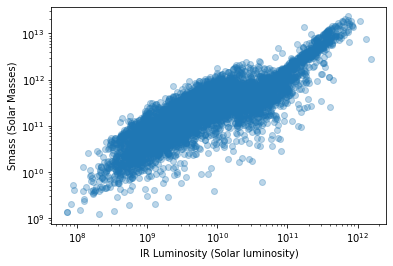

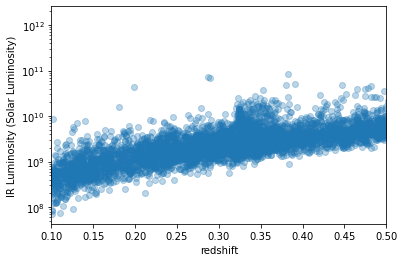

In [146]:
plt.scatter(ir_lum, help_galaxy_smass, alpha = 0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('IR Luminosity (Solar luminosity)')
plt.ylabel('Smass (Solar Masses)')
plt.show()

plt.scatter(help_galaxy_zphot, ir_lum, alpha = 0.3)
plt.xlabel('redshift')
plt.ylabel('IR Luminosity (Solar Luminosity)')
plt.xlim(0.1,0.5)
plt.yscale('log')

Text(0, 0.5, 'Number Count')

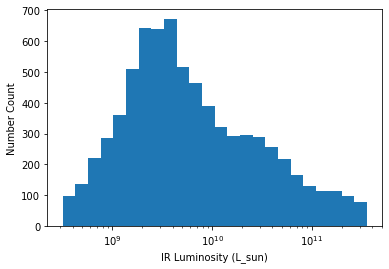

In [8]:
##The following displays the general method of turning
##histograms into probability distributions

##Here we use bins of luminosity but later they will be
##stellar mass within a specific luminosity bin

##Take histogram of luminosities

ir_lum_hist, b = np.histogram(ir_lum, bins = ir_lum_bins)

#Alter each bin to be a probability by dividing each
#bin by the total number of objects

ir_lum_hist_sum = np.sum(ir_lum_hist)

prob_ir_lum_hist = ir_lum_hist/ir_lum_hist_sum

##Plot total distribution of luminosities
##From sample

##We already know it's a bit biased but should work
plt.hist(ir_lum, bins = ir_lum_bins)
plt.xscale('log')
plt.xlabel('IR Luminosity (L_sun)')
plt.ylabel('Number Count')

Text(0, 0.5, 'Number Count')

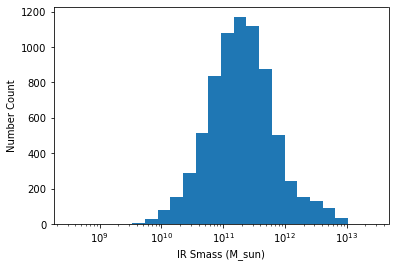

In [9]:
##Filter out the really dim objects that don't fit in the
##luminosity bins from the schecter function

bright = (ir_lum > ir_lum_bins[0]) & (ir_lum < ir_lum_bins[24])

plt.hist(help_galaxy_smass[bright], bins = ir_smass_bins)
plt.xscale('log')
plt.xlabel('IR Smass (M_sun)')
plt.ylabel('Number Count')

In [148]:
print(ir_lum_bins[10], ir_lum_bins[11])

5899746255.923572 7905269254.8627405


Text(0.5, 1.0, 'Distribution of Smass between $5.9 * 10^9$ & $7.9 * 10^9$ Solar Luminosities')

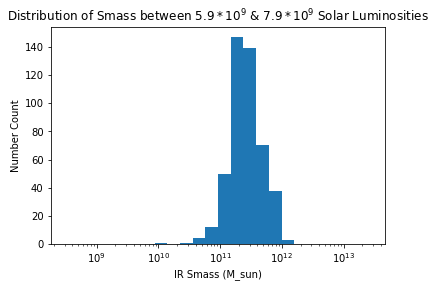

In [150]:

test = (ir_lum > ir_lum_bins[10]) & (ir_lum < ir_lum_bins[11])

plt.hist(help_galaxy_smass[test], bins = ir_smass_bins)
plt.xscale('log')
plt.xlabel('IR Smass (M_sun)')
plt.ylabel('Number Count')
plt.title(r'Distribution of Smass between $5.9 * 10^9$ & $7.9 * 10^9$ Solar Luminosities')

8
[array([4.31030134e+09]), 86715496994.6129]


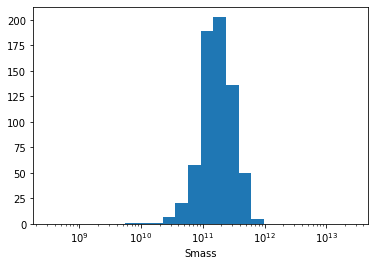

In [10]:
#Start with random lum

sample_lum = get_lum(1)

#find objects in the same luminosity bin
#getting index of bin the object's luminosity belongs in
i = 0

while i < len(ir_lum_bins):
    if (ir_lum_bins[i] < sample_lum) & (ir_lum_bins[i + 1] > sample_lum):
        get_bin = i
        break
    else:
        i = i + 1

print(get_bin)



#find indecies of objects in the same luminosity bin
bin_objects = (ir_lum > ir_lum_bins[get_bin]) & (ir_lum < ir_lum_bins[get_bin + 1])

#make mass histogram of same objects
mass_hist, b = np.histogram(help_galaxy_smass[bin_objects], bins = ir_smass_bins)

plt.hist(help_galaxy_smass[bin_objects], bins = ir_smass_bins)
plt.xscale('log')
plt.xlabel('Smass')

#divide by number of objects to get probabilities of a certain mass bin
prob_mass_hist = mass_hist/np.sum(mass_hist)

#append the value zero on the end to make np.random.choice() happy

prob_mass_hist = np.append(prob_mass_hist, 0)




#choose one to get which mass bin hypothetical mass will be in

mass_bin_num = np.random.choice(np.linspace(0,24,25), 1, p = prob_mass_hist)[0]

#ensure it's an integer to garuntee valid index value

mass_bin_num = int(mass_bin_num)


#choose random mass in that bin
#you can argue np.logspace works better but
#with so many value (50) it hardly makes a difference

##array of elligible masses

possible_masses = np.linspace(ir_smass_bins[mass_bin_num], ir_smass_bins[mass_bin_num + 1], 50)

#choose one to be our made-up galaxies mass

sample_mass = np.random.choice(possible_masses, 1)[0]


#make array of luminosity and mass

sample_gal = [sample_lum, sample_mass]
                                    
print(sample_gal)

Now we need to modularize all this to produce an array of N made up galaxies

In [11]:
def get_galaxies(N):
    #Start with random lum

    sample_lum = get_lum(N)
    #index of sample_luminosities
    j = 0

    #find objects in the same luminosity bin
    #getting index of bin the object's luminosity belongs in
    lum_bin_indecies = np.zeros(N)
    #indecex of above array
    i = 0

    while j < N:
        while i < (len(ir_lum_bins)):
            if (ir_lum_bins[i] <= sample_lum[j]) & (ir_lum_bins[i + 1] >= sample_lum[j]):
                lum_bin_indecies[j] = i
                j = j + 1
                i = 0
                break
            else:
                i = i + 1
    
    j = 0
    sample_mass = np.zeros(N)


    #find indecies of objects in the same luminosity bin
    while j < len(sample_lum):
    
        left_bin = int(lum_bin_indecies[j])
        right_bin = int(lum_bin_indecies[j] + 1)

        #find objects in total sample in same lum bin as simulated galaxy of index j

        bin_objects = (ir_lum > ir_lum_bins[left_bin]) & (ir_lum < ir_lum_bins[right_bin])

        #make mass histogram of same objects
        mass_hist, b = np.histogram(help_galaxy_smass[bin_objects], bins = ir_smass_bins)

        #divide by number of objects to get probabilities of a certain mass bin
        prob_mass_hist = mass_hist/np.sum(mass_hist)


        #append the value zero on the end to make np.random.choice() happy

        prob_mass_hist = np.append(prob_mass_hist, 0)



        #choose one to get which mass bin hypothetical mass will be in

        mass_bin_num = np.random.choice(np.linspace(0,24,25), 1, p = prob_mass_hist)[0]

        #ensure it's an integer to garuntee valid index value

        mass_bin_num = int(mass_bin_num)


        #choose random mass in that bin
        #you can argue np.logspace works better but
        #with so many value (50) it hardly makes a difference

        ##array of elligible masses

        possible_masses = np.linspace(ir_smass_bins[mass_bin_num], ir_smass_bins[mass_bin_num + 1], 50)

        #choose one to be our made-up galaxies mass

        sample_mass[j] = np.random.choice(possible_masses, 1)[0]
        
        j = j + 1


    #make array of luminosity and mass

    sample_gals = [sample_lum, sample_mass]
    
    return sample_gals

In [12]:
get_galaxies(5)

[array([1.96086488e+09, 2.96009407e+09, 4.59967660e+08, 7.58820274e+08,
        4.82176263e+09]),
 array([1.38037005e+11, 1.17501301e+11, 4.87139302e+10, 5.89932652e+10,
        1.66615793e+11])]

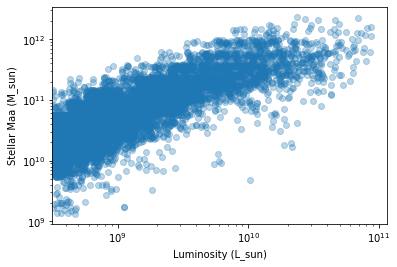

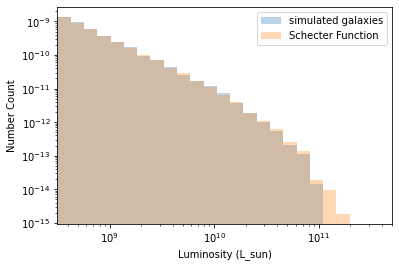

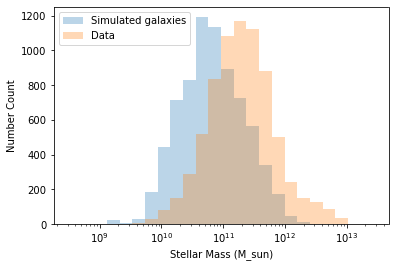

In [143]:
simulated_universe = get_galaxies(7315)

plt.scatter(simulated_universe[0], simulated_universe[1], alpha = 0.3)
plt.xlabel('Luminosity (L_sun)')
plt.ylabel('Stellar Maa (M_sun)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(ir_lum_bins[0])
plt.show()

plt.hist(simulated_universe[0], bins = ir_lum_bins, label = 'simulated galaxies', alpha = 0.3, density = True)
plt.hist(np.random.choice(L, 11095, p = lum_prob), bins = ir_lum_bins,
         label = 'Schecter Function', alpha = 0.3, density = True)
plt.xlabel('Luminosity (L_sun)')
plt.ylabel("Number Count")
plt.xscale('log')
plt.yscale('log')
plt.xlim(ir_lum_bins[0])
plt.legend()
plt.show()

plt.hist(simulated_universe[1], bins = ir_smass_bins, label = 'Simulated galaxies',
         alpha = 0.3)
plt.hist(help_galaxy_smass[bright], bins = ir_smass_bins, label = 'Data', alpha = 0.3)
plt.xlabel('Stellar Mass (M_sun)')
plt.ylabel("Number Count")
plt.xscale('log')
plt.legend()
plt.show()

I actually think all this is a great sign. For one the luminosity curve aligns perfectly with our Schechter Function from earlier. The stellar mass takes a bit of interpretation but I think it's looking good. For one we had to filter the objects that were too dim to be included in the luminosity bins given from the schechter function (those that were too dim) then plot the distribution. That one is shown in orange. The distributions don't match up but this is actually a good thing. This likely signifies that our simulated galaxies are more indicative of a general sample than a biased sample of AGN candidates. This means with an unbiased Schechter function and a biased smass distribution we can actually recover an unbiased distribution of simulated luminosities and stellar masses! Now all that's left (at least to start) is to place these simulated galaxies into the 2D plane in accordance to a density map.

To start we're just gonna steal the density map in it's entirity and use to place the galaxies probabilistically onto the coordinate system. We'll use objects in redshift bin 0.1 - 0.2.

(982,)


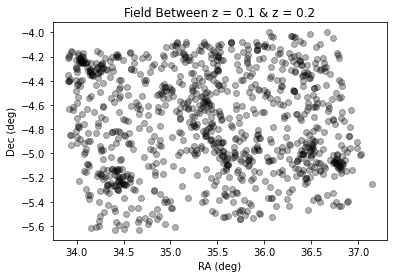

(1024,)


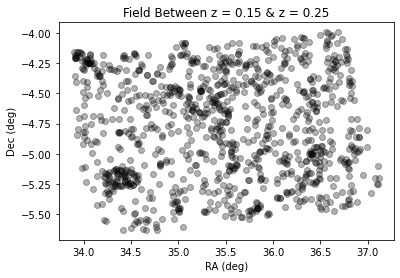

(1321,)


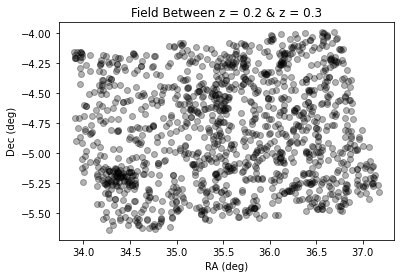

(1742,)


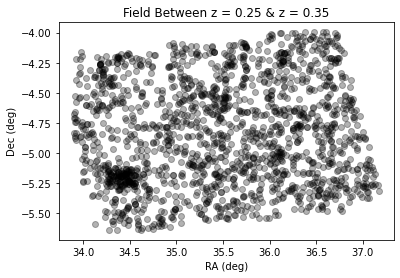

(1656,)


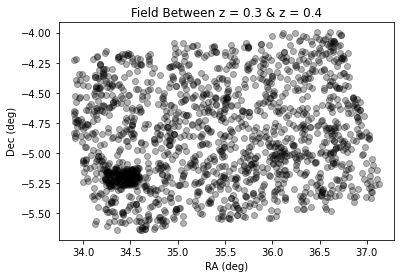

(1149,)


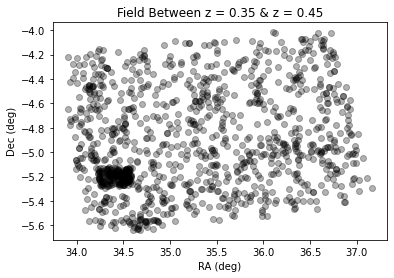

(1008,)


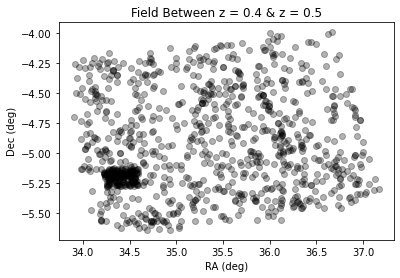

In [14]:
short_field = (help_galaxy_zphot >= 0.1) & (help_galaxy_zphot <= 0.2)

#short_field = short_field & bright

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.1 & z = 0.2')
plt.show()

short_field = (help_galaxy_zphot >= 0.15) & (help_galaxy_zphot <= 0.25)

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.15 & z = 0.25')
plt.show()

short_field = (help_galaxy_zphot >= 0.2) & (help_galaxy_zphot <= 0.3)

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.2 & z = 0.3')
plt.show()

short_field = (help_galaxy_zphot >= 0.25) & (help_galaxy_zphot <= 0.35)

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.25 & z = 0.35')
plt.show()

short_field = (help_galaxy_zphot >= 0.3) & (help_galaxy_zphot <= 0.4)

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.3 & z = 0.4')
plt.show()

short_field = (help_galaxy_zphot >= 0.35) & (help_galaxy_zphot <= 0.45)

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.35 & z = 0.45')
plt.show()

short_field = (help_galaxy_zphot >= 0.4) & (help_galaxy_zphot <= 0.5)

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.4 & z = 0.5')
plt.show()

Let me know when you see the problem. Obviously we're going to need to filter out that rectangle in between RA 34.2 & 34.6, Dec -5.3 & Dec -5.1. It's not a problem of luminosity, they aren't particularly dim. We're just gonna take out all of them in that RA/Dec range

(930,)


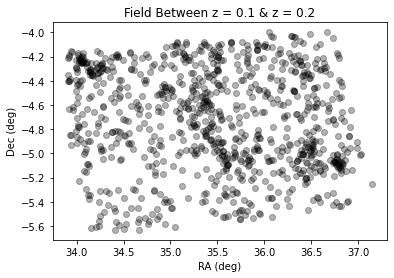

(957,)


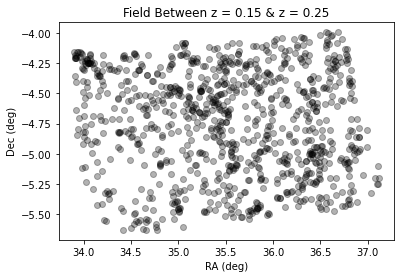

(1240,)


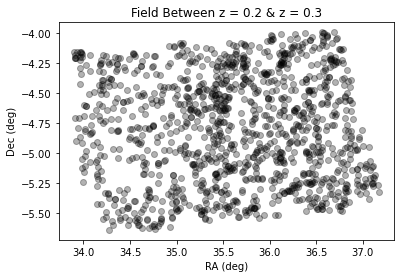

(1608,)


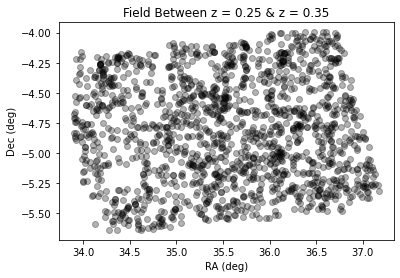

(1456,)


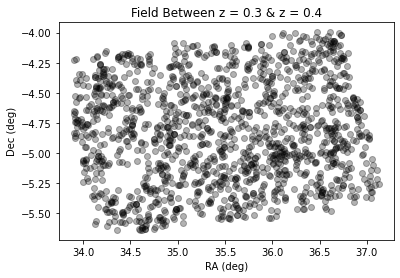

(955,)


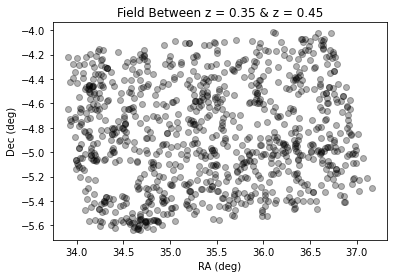

(820,)


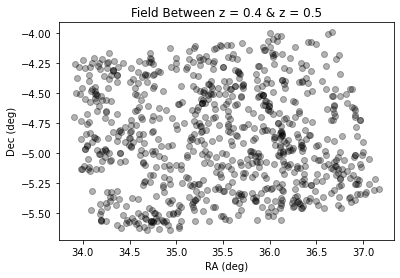

In [15]:
gross = ((help_galaxy_agn_ra > 34.2) & (help_galaxy_agn_ra < 34.6) &
        (help_galaxy_agn_dec > -5.3) & (help_galaxy_agn_dec < -5.1))

not_gross = gross == False

short_field = (help_galaxy_zphot >= 0.1) & (help_galaxy_zphot <= 0.2)

short_field = short_field & not_gross

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.1 & z = 0.2')
plt.show()

short_field = (help_galaxy_zphot >= 0.15) & (help_galaxy_zphot <= 0.25)

short_field = short_field & not_gross

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.15 & z = 0.25')
plt.show()

short_field = (help_galaxy_zphot >= 0.2) & (help_galaxy_zphot <= 0.3)

short_field = short_field & not_gross

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.2 & z = 0.3')
plt.show()

short_field = (help_galaxy_zphot >= 0.25) & (help_galaxy_zphot <= 0.35)

short_field = short_field & not_gross

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.25 & z = 0.35')
plt.show()

short_field = (help_galaxy_zphot >= 0.3) & (help_galaxy_zphot <= 0.4)

short_field = short_field & not_gross

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.3 & z = 0.4')
plt.show()

short_field = (help_galaxy_zphot >= 0.35) & (help_galaxy_zphot <= 0.45)

short_field = short_field & not_gross

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.35 & z = 0.45')
plt.show()

short_field = (help_galaxy_zphot >= 0.4) & (help_galaxy_zphot <= 0.5)

short_field = short_field & not_gross

print(help_galaxy_zphot[short_field].shape)

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Field Between z = 0.4 & z = 0.5')
plt.show()

Now to calculate density. We'll do it the old fashioned way, dice the grid into 100 pieces and calculate the number of dots in each square. $$\rho_N = \frac{N}{V}$$

My initial thought is to somehow store the density in a lattice, kind of like what we did for the Metro algorithm.

In a real light cone algorithm there's somehting called kernal smoothing which is like a spatial version of variable step size. As the code sweeps over the field it segements it into finer and finer squares in the areas where there a more objects and into larger ones where there are few objects. This increases accuracy, precision, and perhaps runttime. However we don't have time to implement it. Certainly worth talking about in the presentations, though.

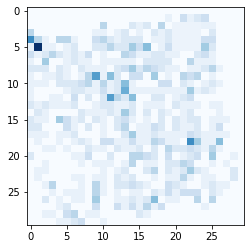

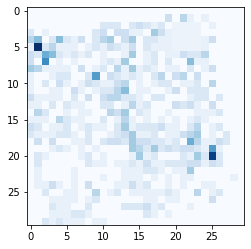

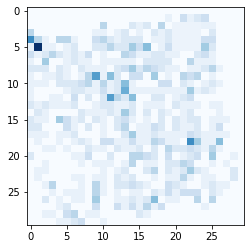

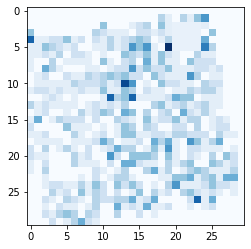

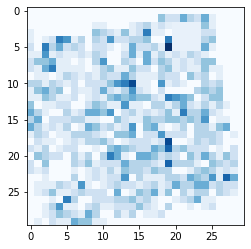

In [260]:
divs = 30

def get_densities(z_min, z_max, size):
    #filter objects to be in certain redshift bin
    field = (help_galaxy_zphot >= z_min) & (help_galaxy_zphot <= z_max) & not_gross
    
    #field = field & not_gross
    
    ra = help_galaxy_agn_ra[field]
    
    dec = help_galaxy_agn_dec[field]
    
    #divide up field into 100 squares of equal size
    ra_divs = np.linspace(min(help_galaxy_agn_ra), max(help_galaxy_agn_ra), size)
    
    dec_divs = np.linspace(min(help_galaxy_agn_dec), max(help_galaxy_agn_dec), size)
    
    area = (ra_divs[1] - ra_divs[0]) * (dec_divs[1] - dec_divs[0]) #in units of deg^2
    
    #initialize density lattice
    densities = np.zeros((len(ra_divs),len(dec_divs)))
    i = 0 #row number
    j = 0 #column number
    
    while j < (len(ra_divs) - 1):
        while i < (len(dec_divs) - 1):
            #find objects in sample with same ra & dec range in one lattice site
            square = ((ra >= ra_divs[j]) & (ra <= ra_divs[j + 1]) &
                      (dec >= dec_divs[i]) & (dec <= dec_divs[i + 1]))
            
            #number of items in square
            N = int(len(ra[square]))
            
            ##FOR RIGHT NOW AREA WILL BE IN UNITS OF DEGREE, CHANGE LATER TO MPC
            
            densities[i,j] = N/area
            
            i = i + 1
            
        j = j + 1
        i = 0
    
    #we need to flip the whole array so that the decs read correctly because
    #the code up until now was reading dec from low to high not high to low
    
    densities = np.flip(densities, 0)
    
    #Additional measure to ensure there are no tiles with zero density
    #add the average density across all lattice sites to each site
    
    #To give those with no galaxies a bit of a boost and thus
    #Real chance of generating a galaxy in the simulation
    
    ##We also really don't want any tiles with zero density because it will
    ##cause an error later on in the generation of coordinates
    
    densities = densities + (1e1)
    
    #We also filtered out that 'gross' section, let's increase the density
    #in that area to be half the average density
    
    #gross region are sites [2,20] => [5,23]
    
    i = 2
    j = 20
    
    while j < 24:
        while i < 6:
            
            densities[i,j] = 1.3e+2
            
            i = i + 1
            
        i = 2
        
        j = j + 1
    
    return densities

def density_prob(z_min, z_max, size):
    den_prob = get_densities(z_min, z_max, size)/np.sum(get_densities(z_min, z_max, size))
    
    #Ensure the sum of all the lattice sites is one
    
    #difference between sum of all lattice sites and 1
    #could be positive, could be negative
    
    diff = 1 - np.sum(den_prob)
    
    #replace lattice point with largest density to ensure it truly adds up to one
    #arbirary choice but it works
    
    heavy_den = den_prob > 1e-3
    
    den_prob[heavy_den][0] = den_prob[heavy_den][0] + diff
    
    return den_prob

plt.imshow(get_densities(0.15, 0.25, divs), cmap = 'Blues')
plt.show()

plt.imshow(density_prob(0.1, 0.2, divs), cmap = 'Blues')
plt.show()

plt.imshow(density_prob(0.15, 0.25, divs), cmap = 'Blues')
plt.show()

plt.imshow(density_prob(0.2, 0.3, divs), cmap = 'Blues')
plt.show()

plt.imshow(density_prob(0.25, 0.35, divs), cmap = 'Blues')
plt.show()


In [261]:
def get_coords(z):
    
    #define redshift window as extending
    #0.05 forward and 0.05 back
    z_min = z - 0.05
    z_max = z + 0.05
    
    #find the density map of this redshift slice
    den_prob = density_prob(z_min, z_max, divs)

    
    #We need to select a random site
    
    #My idea is to use np.random.choice which needs we need
    #to turn this 2D array into a 1D array and number each
    #lattice point
    
    #number each lattice point in one dim array
    lattice_1D =  np.linspace(0, divs**2 - 1, divs**2)
    
    #show numbering in 2D array
    #same size as the density field but now 2D
    lattice_2D = np.reshape(lattice_1D, (divs, divs))
    
    #change density prob to one dim array
    #shape is number of divisions sqaured
    
    den_prob = np.reshape(den_prob, (divs**2))
    
    #choose a random lattice site
    
    site = np.random.choice(lattice_1D, 1, p = den_prob)
    
    site = (site == lattice_2D)
    
    site = np.where(site == True)
    
    #Now we gotta find the RA and Dec values this site coresponds to
    
    #divide up field into squares of equal size
    ra_divs = np.linspace(min(help_galaxy_agn_ra), max(help_galaxy_agn_ra), divs)
    
    dec_divs = np.linspace(min(help_galaxy_agn_dec), max(help_galaxy_agn_dec), divs)
    
    dec_divs = np.flip(dec_divs)
    
    #make empty 2D array containg pair of coordinates
    #after loop each element will be the coordinate at the center
    #of each lattice point
    coords = np.zeros((divs,divs,2))

    i = 0
    j = 0

    while j < divs:
        while i < divs:

            coords[i,j] = [ra_divs[i],dec_divs[j]]

            i = i + 1

        j = j + 1

        i = 0
        
    #the ra_dec at the center of our lattice point
    
    ra_dec = coords[site[1], site[0]][0]
    
    #now let's perturb it randomly to get spread
    
    ra = ra_dec[0]
    
    #angular ra distance from center of site to edge
    delta_ra = (max(help_galaxy_agn_ra) - min(help_galaxy_agn_ra))/(2*divs)

    dec = ra_dec[1]
    
    #angular dec distance from center of site to edge
    delta_dec = (max(help_galaxy_agn_dec) - min(help_galaxy_agn_dec))/(2*divs)
    
    
    ra = ra + np.random.choice(np.linspace(-delta_ra, delta_ra, 100),1)
    
    dec = dec + np.random.choice(np.linspace(-delta_dec, delta_dec, 100),1)
    
    return ra, dec

get_coords(0.2)

(array([33.85399878]), array([-4.55437957]))

In [262]:
def simulation(N, divs):
    #get lum and smass
    gals_lum_smass = get_galaxies(N)
    
    #generate redshift
    z = np.random.choice(np.linspace(0.1, 0.5, 50), N)
    i = 0
    
    ra = np.zeros(N)
    
    dec = np.zeros(N)
    
    while i < len(z):
        
        ra[i], dec[i] = get_coords(z[i])
        i = i + 1
    
    #in simulation: ra, dec, z, lum, smass
    gals = [ra, dec, z, gals_lum_smass[0], gals_lum_smass[1]]
    
    return gals

In [263]:
simulated_universe = simulation(4300, divs)

In [264]:
ra = simulated_universe[0]

dec = simulated_universe[1]

redshift = simulated_universe[2]

sim_lum = simulated_universe[3]

sim_smass = simulated_universe[4]

z_bin = (redshift >= 0.1) & (redshift <= 0.5)

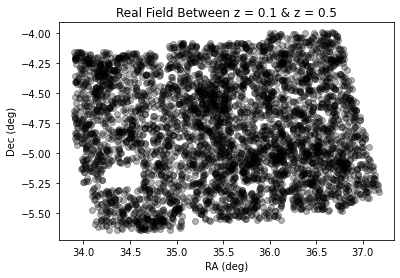

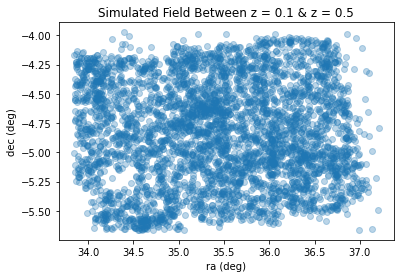

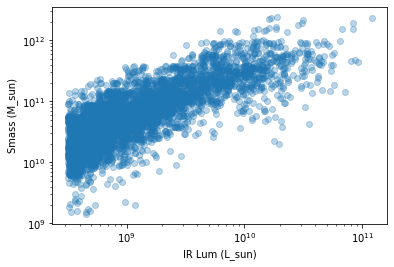

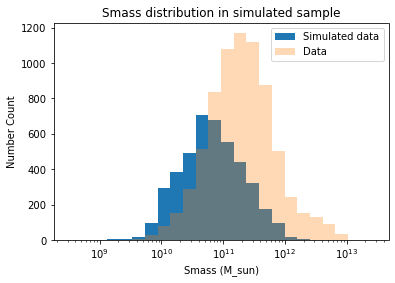

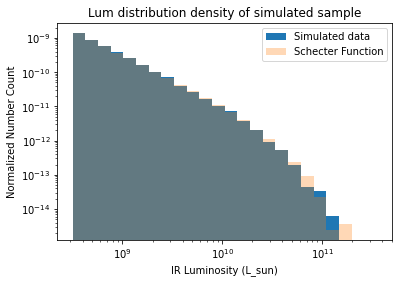

In [268]:
short_field = (help_galaxy_zphot >= 0.1) & (help_galaxy_zphot <= 0.5) & not_gross

plt.scatter(help_galaxy_agn_ra[short_field], help_galaxy_agn_dec[short_field],
            color = 'black', alpha = 0.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Real Field Between z = 0.1 & z = 0.5')
plt.show()

plt.scatter(ra[z_bin], dec[z_bin], alpha = 0.3)
plt.title('Simulated Field Between z = 0.1 & z = 0.5')
plt.xlabel('ra (deg)')
plt.ylabel('dec (deg)')
plt.show()

plt.scatter(sim_lum, sim_smass, alpha = 0.3)
plt.xlabel('IR Lum (L_sun)')
plt.ylabel('Smass (M_sun)')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.hist(sim_smass, bins = ir_smass_bins, label = 'Simulated data')
plt.hist(help_galaxy_smass[bright], bins = ir_smass_bins, label = 'Data', alpha = 0.3)
plt.title('Smass distribution in simulated sample')
plt.xlabel('Smass (M_sun)')
plt.ylabel('Number Count')
plt.xscale('log')
plt.legend()
plt.show()

plt.hist(sim_lum, bins = ir_lum_bins, label = 'Simulated data', density = True)
plt.hist(np.random.choice(L, 11095, p = lum_prob), bins = ir_lum_bins,
         label = 'Schecter Function', alpha = 0.3, density = True)
plt.title('Lum distribution density of simulated sample')
plt.xlabel('IR Luminosity (L_sun)')
plt.ylabel('Normalized Number Count')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

Something about the spread of the simulated galaxies doesn't look quite right yet. Maybe make a density map of the simulated universe in small redshift bin like 0.1 < z < 0.2 and compare it real data and see if you get something similar. It's possible it's working just fine but I'm reading too much into it.

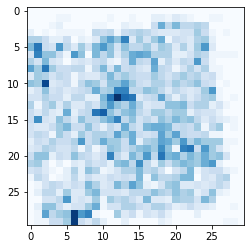

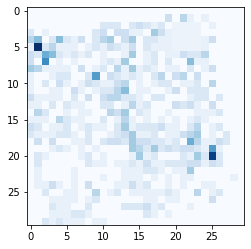

In [266]:
def sim_density(z_min, z_max, size, sample):
    
    z = sample[2]
    
    #filter objects to be in certain redshift bin
    field = (z >= z_min) & (z <= z_max)
    
    #field = field & not_gross
    
    ra = sample[0]
    
    dec = sample[1]
    
    #divide up field into 100 squares of equal size
    ra_divs = np.linspace(min(sample[0]), max(sample[0]), size)
    
    dec_divs = np.linspace(min(sample[1]), max(sample[1]), size)
    
    area = (ra_divs[1] - ra_divs[0]) * (dec_divs[1] - dec_divs[0]) #in units of deg^2
    
    #initialize density lattice
    densities = np.zeros((len(ra_divs),len(dec_divs)))
    i = 0 #row number
    j = 0 #column number
    
    while j < (len(ra_divs) - 1):
        while i < (len(dec_divs) - 1):
            #find objects in sample with same ra & dec range in one lattice site
            square = ((ra >= ra_divs[j]) & (ra <= ra_divs[j + 1]) &
                      (dec >= dec_divs[i]) & (dec <= dec_divs[i + 1]))
            
            #number of items in square
            N = int(len(ra[square]))
            
            ##FOR RIGHT NOW AREA WILL BE IN UNITS OF DEGREE, CHANGE LATER TO MPC
            
            densities[i,j] = N/area
            
            i = i + 1
            
        j = j + 1
        i = 0
    
    #we need to flip the whole array so that the decs read correctly because
    #the code up until now was reading dec from low to high not high to low
    
    densities = np.flip(densities, 0)
    
    #Additional measure to ensure there are no tiles with zero density
    #add the average density across all lattice sites to each site
    
    #To give those with no galaxies a bit of a boost and thus
    #Real chance of generating a galaxy in the simulation
    
    ##We also really don't want any tiles with zero density because it will
    ##cause an error later on in the generation of coordinates
    
    densities = densities + (1e-4)
    
    #We also filtered out that 'gross' section, let's increase the density
    #in that area to be half the average density
    
    #not yet lol
    
    return densities

plt.imshow(sim_density(0.1, 0.2, divs, simulated_universe), cmap = 'Blues')
plt.show()

plt.imshow(density_prob(0.1, 0.2, divs), cmap = 'Blues')
plt.show()